# Project 2 - Ames Housing Data and Kaggle Challenge

In this project I was given the Ames Housin Dataset consisting of over 70 columns of different features relating to houses. My task was to create a regression model to be able to predict the price of the house at sale based on the characteristics of the house. This model will help real-estate agents, and others, to be able to more accurately price a new house going on the market. 

First and foremost I had to focus on exploring the data, identifying outliers and filling in missing values. After I made the data appropriate to fit in to a regression model I used the sklearn LinearRegression to model. I also fit a lasso and ridge models.

The success of the models was measured by R^2 and RMSE. Submission on Kaggle, allowed to check the model on a new set of data.

# EDA, Data Cleaning, Feature Engineering

### Content:

- [Data Import and First Glance](#Data-Import-and-First-Glance)
- [Target Variable](#Target-Variable)
- [Feature Variables](#Feature-Variables)
    - [Missing Values](#Missing-Values)
    - [Collinearity and Feature Engineering](#Collinearity-and-Feature-Engineering)
    - [Correlation](#Correlation)
    - [Outliers](#Outliers)
    - [Normalizing and Scaling](#Normalizing-and-Scaling)
    - [Encoding](#Encoding)
- [Saving Cleaned Data](#Saving-Cleaned-Data)

## Data Import and First Glance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

print('The shape of the Train data is {}'.format(train.shape))
print('The shape of the Test data is {}'.format(test.shape))

The shape of the Train data is (2051, 81)
The shape of the Test data is (878, 80)


In this project we are provided with two data sets: Train and Test. I will use the train data set to fit and train my model. The test data set will be reserved for Kaggle submission. You can see that there is a column difference between train and test. That is because the test data is missing the "SalePrice" target which we are trying to predict. The description of what each variable means can be found on [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).

In [3]:
train.head(4)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000


In [4]:
test.head(4)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD


In [5]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [6]:
test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

## Target Variable

The first thing I took a look at was our Target Variable, Sale Price. I wanted to check for normality of it's distribution. The dual graphs below compare the skewness of the original Sale Price and the skewness after taking the log of it. [Skew](https://brownmath.com/stat/shape.htm) approximates normal distribution when it gets closer to zero. You can see that the original data had a skew score of 1.56, which is quite large. To correct any shortcoming in meeting our Multiple Linear Regression assumptions, I took the log of the Sale Price. After taking to log of the variable, the skew score went down to -0.15 which makes it now approximately symmetrical. Taking a log of something pulls the data closer to it's median. 

Skew of original distribution: 1.5575514385863427
Skew of log of sale price: -0.14681576272177396


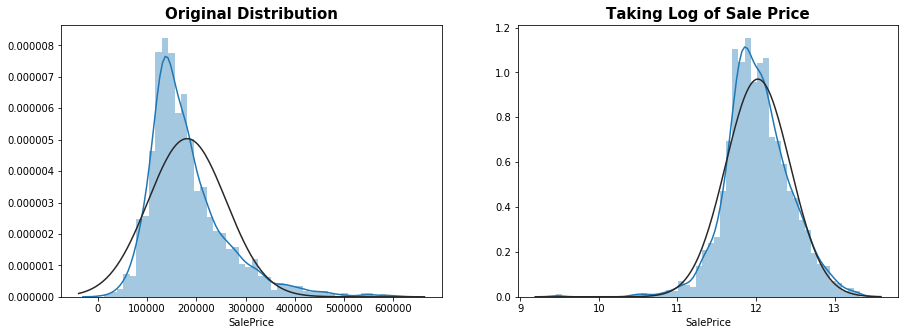

In [7]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

#plotting the distribution of original SalePrice column.
sns.distplot(train['SalePrice'], fit = stats.norm, ax = ax[0]);
ax[0].set_title('Original Distribution', weight = 'bold', fontsize = 15)
skew_saleprice = train['SalePrice'].skew()


#taking log() of SalePrice
loged_saleprice = np.log(train['SalePrice'])

sns.distplot(loged_saleprice, ax = ax[1], fit = stats.norm)
ax[1].set_title('Taking Log of Sale Price', weight = 'bold', fontsize = 15);
skew_loged = loged_saleprice.skew()
print('Skew of original distribution: {}'.format(skew_saleprice))
print('Skew of log of sale price: {}'.format(skew_loged))

In [8]:
#changing the SalePrice column to log(SalePrice)
train['SalePrice'] = loged_saleprice

Below I decided to take a look at a swarmplot of now logged Sale Price. I noticed that there were two houses that were very low in price. I was afraid that these outliers were going to influence our model in a negative way. Since they are not a very good representation of the distribution of our Target variable. At the end I decided to remove them. This improved my Kaggle public score by 400 points.

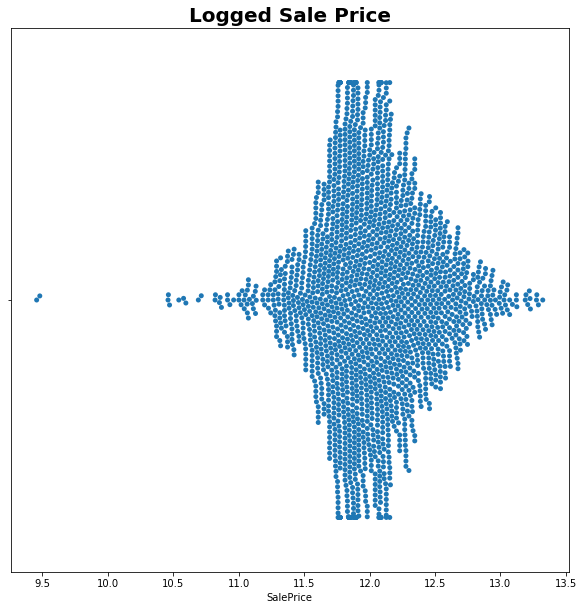

In [9]:
fig, ax = plt.subplots(figsize = (10,10))
sns.swarmplot(train['SalePrice'])
plt.title('Logged Sale Price', weight = 'bold', fontsize = 20);

In [10]:
train.sort_values(by='SalePrice', ascending = True).head(4)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1628,182,902207130,30,RM,68.0,9656,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,9.456341
183,1554,910251050,20,A (agr),80.0,14584,Pave,NaN,Reg,Low,...,0,0,NaN,NaN,NaN,0,2,2008,WD,9.480368
1309,727,902477120,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,...,0,0,NaN,GdWo,NaN,0,11,2009,WD,10.460242
1292,2844,909101330,30,RL,60.0,8088,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,2,2006,ConLD,10.463103


In [11]:
#removing the outliers
train = train.drop([1628, 183], axis = 0)

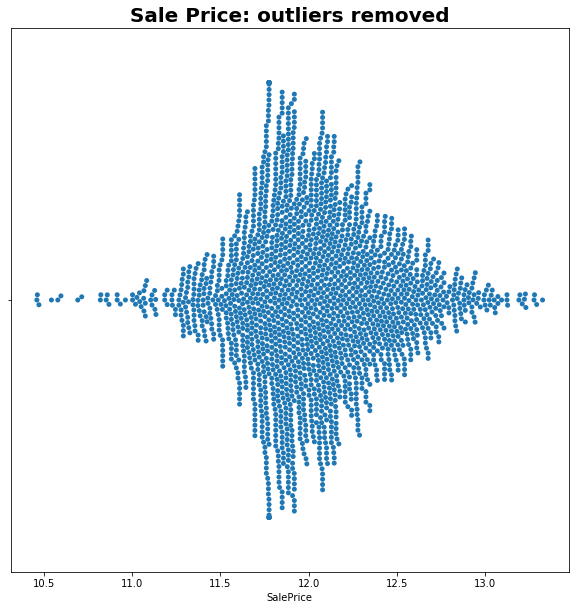

In [12]:
#looking at the data to make sure the outliers were removed
fig, ax = plt.subplots(figsize = (10,10))
sns.swarmplot(train['SalePrice'])
plt.title('Sale Price: outliers removed', weight = 'bold', fontsize =20);

## Feature Variables

### Missing Values

The first thing that needed to be done was dealing with missing values. First, I took a look of numerical features that were missing. The Lot Frontage was the largest offended. Since it doesn't make sense for a house not to have a lot frontage (linear feet of street connected to property), I went ahead and interpolated the missing values with a median value per Neighborhood. It made sense to me that the this number would fluctuate depending on which neighborhood the house stood. The remaining numerical missing values were filled with 0. This was due to the fact that the house didn't have this feature in places where there was a missing values. For the categorical features, I went ahead and set the missing values to "None". This was done for the same reason as filling the numericals with 0. The houses just didn't have those features.

In [13]:
# extracting only numerical features
train_num = train.select_dtypes(include = [np.number])
# printing the number of total missing values for each feature
train_num.isna().sum().sort_values(ascending = False).head(12)

Lot Frontage      330
Garage Yr Blt     114
Mas Vnr Area       22
Bsmt Half Bath      2
Bsmt Full Bath      2
Garage Cars         1
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Garage Area         1
Lot Area            0
dtype: int64

In [14]:
# interpolating by the mean of neighborhood
train['Lot Frontage'] = train.groupby(['Neighborhood'])['Lot Frontage'].apply(lambda x:x.fillna(x.median()))
#setting to 0, in places where house didn't have the feature
missing_numerical = ['Garage Yr Blt', 'Mas Vnr Area', 'Bsmt Half Bath', 'Bsmt Full Bath',
                    'Garage Cars', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Garage Area']
for col in missing_numerical:
    train[col] = train[col].fillna(int(0))

In [15]:
#extracting the categorical variables
train_cat = train.select_dtypes(exclude = [np.number])
#printing the number of missing values
train_cat.isna().sum().sort_values(ascending = False).head(15)

Pool QC           2040
Misc Feature      1984
Alley             1909
Fence             1649
Fireplace Qu       999
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       57
BsmtFin Type 2      55
BsmtFin Type 1      54
Bsmt Cond           54
Bsmt Qual           54
Mas Vnr Type        22
dtype: int64

In [16]:
#setting all the missing values of categorical features to None
for col in train_cat.columns:
    train[col] = train[col].fillna('None')
    
train=train.dropna(axis=0)

Of course, we needed to do the same thing for the test data set.

In [17]:
test.select_dtypes(include = [np.number]).isna().sum().sort_values(ascending = False).head(3)

Lot Frontage     160
Garage Yr Blt     45
Mas Vnr Area       1
dtype: int64

In [18]:
test['Lot Frontage'] = test.groupby(['Neighborhood'])['Lot Frontage'].apply(lambda x:x.fillna(x.median()))
test['Garage Yr Blt'] = test['Garage Yr Blt'].fillna(int(0))
test['Mas Vnr Area'] = test['Mas Vnr Area'].fillna(int(0))
#categorical features    
test_cat = test.select_dtypes(exclude = [np.number])
for col in test_cat.columns:
    test[col] = test[col].fillna('None')


### Collinearity and Feature Engineering

It appeared to me that certain features could be combined in to one. I created a new variable called "TotalSF", which was a total square footage of the house. The TotalBath is the total number of bathrooms in the house. And the TotalPorch combines square footage of all available types of porches. 

In [19]:
train['TotalSF'] = train['1st Flr SF'] + train['2nd Flr SF'] + train['Total Bsmt SF']

train = train.drop(['1st Flr SF', '2nd Flr SF'], axis = 1)

train['TotalBath'] = train['Bsmt Full Bath']+(0.5*train['Bsmt Half Bath'])+train['Full Bath']+(0.5*train['Half Bath'])

train = train.drop(['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath'], axis = 1)

train['TotalPorch'] = train['Wood Deck SF']+train['Open Porch SF']+train['Enclosed Porch']+train['3Ssn Porch']+train['Screen Porch']
train = train.drop(['Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch'],axis = 1)

#####################################################################################################################
test['TotalSF'] = test['1st Flr SF'] + test['2nd Flr SF'] + test['Total Bsmt SF']

test = test.drop(['1st Flr SF', '2nd Flr SF'], axis = 1)

test['TotalBath'] = test['Bsmt Full Bath']+(0.5*test['Bsmt Half Bath'])+test['Full Bath']+(0.5*test['Half Bath'])

test = test.drop(['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath'], axis = 1)

test['TotalPorch'] = test['Wood Deck SF']+test['Open Porch SF']+test['Enclosed Porch']+test['3Ssn Porch']+test['Screen Porch']
test = test.drop(['Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch'], axis=1)

Then it was time to deal with collinearity. Garage Cars and Garage Area basically tell the same story. The larger the garage, the more cars you can fit in there. BsmtFin SF 1, Bsmt Unf SF, and BsmtFin SF 2 were also reduntant since there was already a Total Bsmt SF variable. 

In [20]:
train = train.drop(['Garage Cars'], axis = 1)
train = train.drop(['BsmtFin SF 1', 'Bsmt Unf SF', 'BsmtFin SF 2'], axis =1)
train = train.drop(['Garage Cond'], axis = 1)

#####################################################################################################################
test = test.drop(['Garage Cond'], axis =1)
test = test.drop(['BsmtFin SF 1', 'Bsmt Unf SF', 'BsmtFin SF 2'], axis =1)
test = test.drop(['Garage Cars'], axis = 1)

### Correlation

I wanted to take a look at the correlation of the numerical variables to Sale Price. I noticed that the two variables that are corrilated the most with Sale Price turned out to be Overall Qual and Total SF. This made sense to me since conventionally the quality of the house and the square feet of the house are a big factor in deciding which house to buy. It made sence to them compare graphically to see the bigger picture. From the count plots we see that majority of the houses have 2 or 2.5 bathrooms and 6 rooms above ground. Majority of the houses are of newer built.

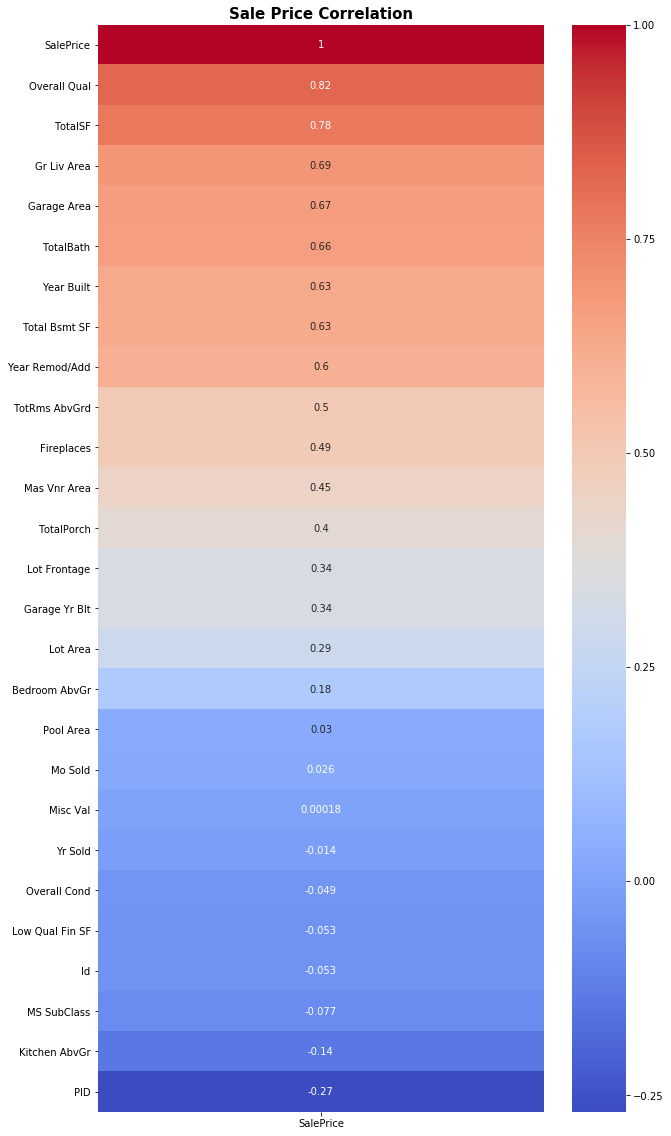

In [21]:
plt.figure(figsize=(10,20))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice', ascending=False),
            annot=True, cmap='coolwarm')
plt.title('Sale Price Correlation', weight = 'bold', fontsize = 15);

In [22]:
#making a list of correlate variables to be used later in modeling
correlation = train.corr()[['SalePrice']]
top_correlation = correlation[(correlation.SalePrice>0.05) | (correlation.SalePrice<-0.05)].sort_values(by='SalePrice',
                                                                                                       ascending = False)

top_correlation

,SalePrice
SalePrice,1.000000
Overall Qual,0.823140
TotalSF,0.780697
Gr Liv Area,0.693709
Garage Area,0.669626
TotalBath,0.664076
Year Built,0.630076
Total Bsmt SF,0.626904
Year Remod/Add,0.604882
TotRms AbvGrd,0.500529


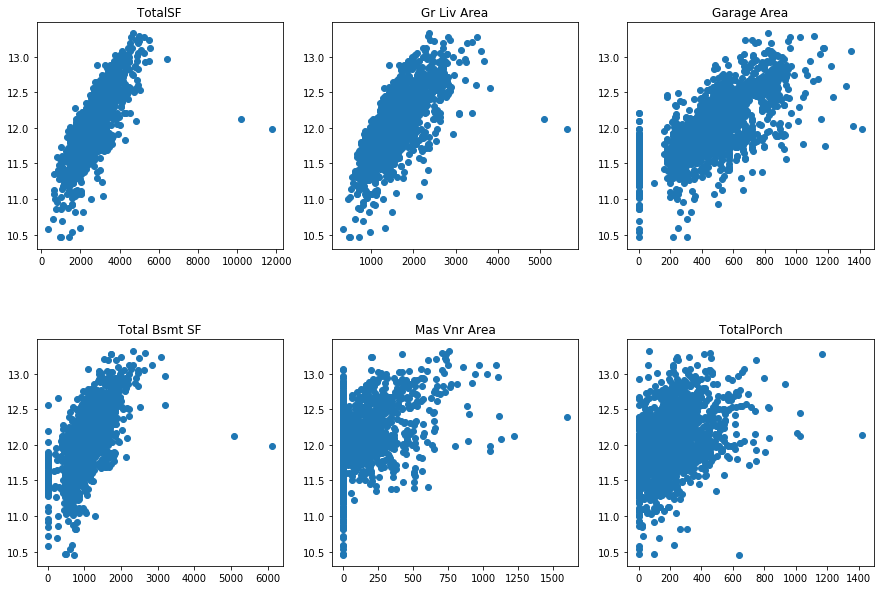

In [23]:
#Comparing with scatter plots the top correlated variables with target variable
# Sale Price is on the y axis
columns_top_corr_scatter = [['TotalSF', 'Gr Liv Area', 'Garage Area'],
                           ['Total Bsmt SF', 'Mas Vnr Area', 'TotalPorch']]


fig, ax = plt.subplots(2, 3, figsize = (15,10))
plt.subplots_adjust(hspace = 0.4)

for i in range(3):
    for j in range(2):
       ax[j,i].scatter(train[columns_top_corr_scatter[j][i]], train['SalePrice'])
       ax[j,i].set_title(columns_top_corr_scatter[j][i]) 

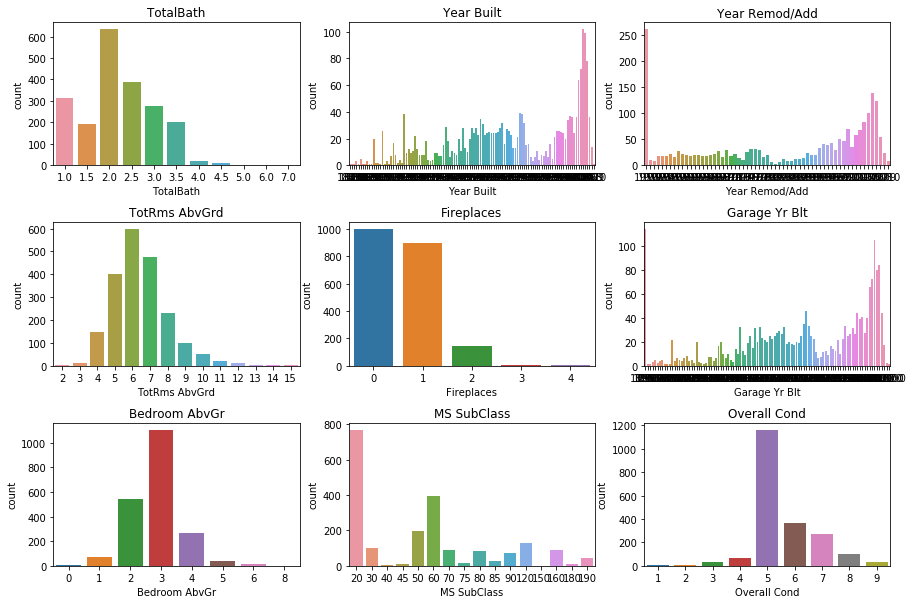

In [24]:
columns_top_corr_bar = [['TotalBath', 'Year Built', 'Year Remod/Add'], ['TotRms AbvGrd', 'Fireplaces', "Garage Yr Blt"],
                       ['Bedroom AbvGr', 'MS SubClass', 'Overall Cond']]


fig, ax = plt.subplots(3, 3, figsize = (15,10))
plt.subplots_adjust(hspace = 0.4)

for i in range(3):
    for j in range(3):
       sns.countplot(train[columns_top_corr_bar[j][i]], ax = ax[j,i])
       ax[j,i].set_title(columns_top_corr_bar[j][i]) 

Now it was time to take a look at the categorical variables. For find the correlation of categorical variables I used the ANOVA test. According to [Wikipedia](https://en.wikipedia.org/wiki/Analysis_of_variance) ANOVA "provides a statistical test of whether two or more population means are equal, and therefore generalizes the t-test beyond two means". For example, there is multiple different Neighborhood choices. We want to know if different neighborhoods have an influence on our Sale Price. 

As an example in case of Neighborhoods: null hypothesis: there is no significant difference between SalePrice mean between the neighborhood. Alternative hypothesis is that there is a difference between the means. Apply similar hypothesis break down for other features. 

The categorical values that have the largest influence came out to be Neighborhood, Bsmt Qual and External Quality. This too makes sence, since usually prices in cities vary by neighborhood and people do want a nice basement and curb appeal. 

The smaller the p-value the more correlated the feature is. I took a log of the p-values to plot the [result](https://www.biostars.org/p/358046/). After finding the top correlated features, I made a new data set that only contained the top correlations and worked with that onward. 

In [25]:
train_cat = train.select_dtypes(exclude = [np.number])

pvalues_fin = pd.DataFrame(columns = ['features', 'pvalue'])


pvalues_fin['features'] = train_cat.columns


#https://stackoverflow.com/questions/44065573/anova-for-groups-within-a-dataframe-using-scipy


pvals=[]
for col in train_cat.columns:
    
    samples = list([])
    for cat in train[col].unique():
    #samples = [condition[1] for condition in name_group[1]['SalePrice']]
        s = list(train[train[col] == cat]['SalePrice'])
        samples.append(s)
    pval=stats.f_oneway(*samples)[1] 
    
    pvals.append(pval)
pvalues_fin['pvalue'] = pvals

#picking the lowest 20 pvalue scores to fit into our model
cat_model = pvalues_fin.sort_values(by='pvalue', ascending = True).iloc[:20]

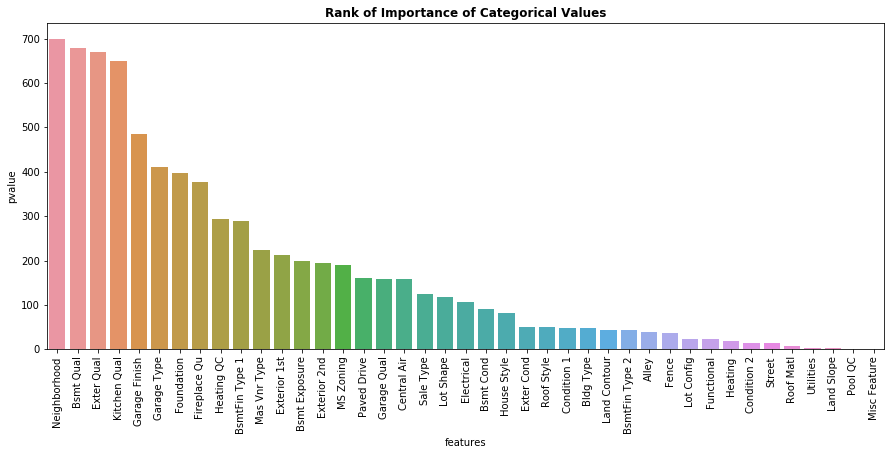

In [26]:
#https://www.biostars.org/p/358046/

pvalues_fin['pvalue'] = np.log(1/pvalues_fin['pvalue'])

pvalues_fin.loc[8, 'pvalue'] = 700 #our Neighborhood feature has a pvalue of 0, 
#so it's not showing up on graph but it has the highest bar, so making hard coded observation

fig, ax = plt.subplots(figsize = (15,6))
sns.barplot(data=pvalues_fin.sort_values(by='pvalue', ascending=False), x = 'features', y='pvalue', ax=ax) 
plt.xticks(rotation=90)
plt.title('Rank of Importance of Categorical Values', weight = 'bold'); 



In [27]:
#print of values we will feed the model
list(cat_model.features)

['Neighborhood',
 'Bsmt Qual',
 'Exter Qual',
 'Kitchen Qual',
 'Garage Finish',
 'Garage Type',
 'Foundation',
 'Fireplace Qu',
 'Heating QC',
 'BsmtFin Type 1',
 'Mas Vnr Type',
 'Exterior 1st',
 'Bsmt Exposure',
 'Exterior 2nd',
 'MS Zoning',
 'Paved Drive',
 'Garage Qual',
 'Central Air',
 'Sale Type',
 'Lot Shape']

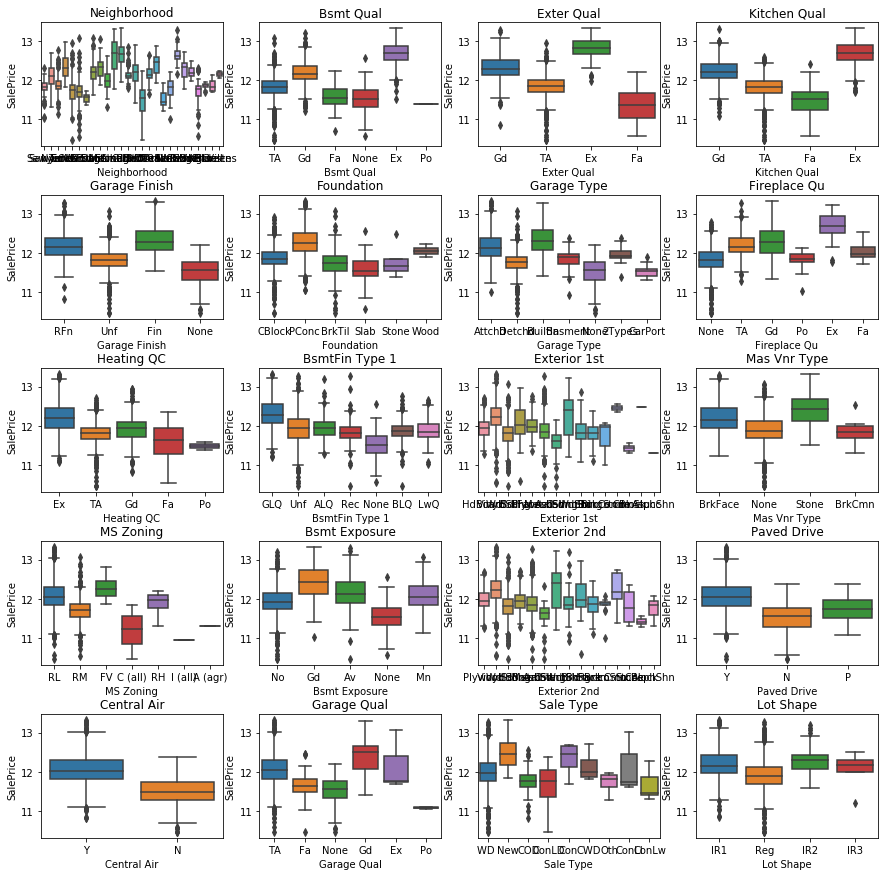

In [28]:
columns_smallest_p = [['Neighborhood', 'Bsmt Qual', 'Exter Qual', 'Kitchen Qual'],
                     ['Garage Finish', 'Foundation', 'Garage Type', 'Fireplace Qu'],
                     ['Heating QC', 'BsmtFin Type 1', 'Exterior 1st', 'Mas Vnr Type'],
                     ['MS Zoning', 'Bsmt Exposure', 'Exterior 2nd', 'Paved Drive'],
                     ['Central Air', 'Garage Qual', 'Sale Type', 'Lot Shape']]

fig, ax = plt.subplots(5, 4, figsize = (15,15))
plt.subplots_adjust(hspace = 0.4)

for i in range(4):
    for j in range(5):
       sns.boxplot(train[columns_smallest_p[j][i]], train['SalePrice'], ax = ax[j,i])
       ax[j,i].set_title(columns_smallest_p[j][i])

In the below countplot, I take a look at the distribution of my categorical variables. I saw that a lot of them had an observation that took on the majority. Later on, when I encode I will deal with those.

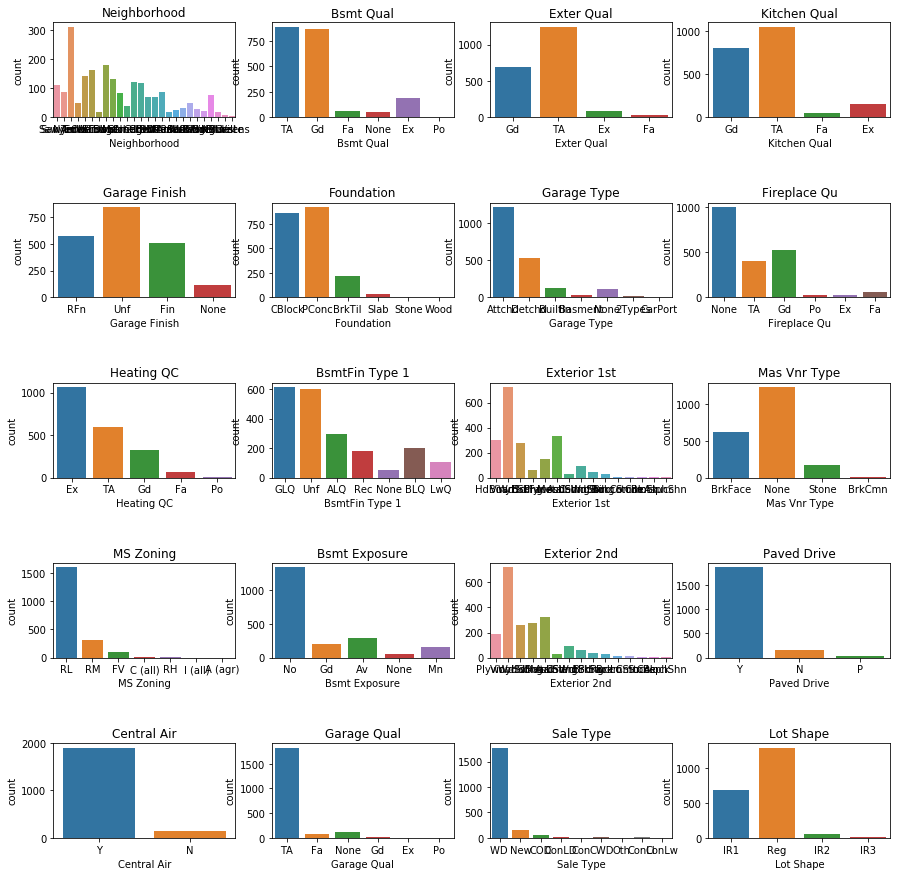

In [29]:
columns_smallest_p = [['Neighborhood', 'Bsmt Qual', 'Exter Qual', 'Kitchen Qual'],
                     ['Garage Finish', 'Foundation', 'Garage Type', 'Fireplace Qu'],
                     ['Heating QC', 'BsmtFin Type 1', 'Exterior 1st', 'Mas Vnr Type'],
                     ['MS Zoning', 'Bsmt Exposure', 'Exterior 2nd', 'Paved Drive'],
                     ['Central Air', 'Garage Qual', 'Sale Type', 'Lot Shape']]


fig, ax = plt.subplots(5, 4, figsize = (15,15))
plt.subplots_adjust(hspace = 0.9)

for i in range(4):
    for j in range(5):
       sns.countplot(train[columns_smallest_p[j][i]], ax=ax[j,i])
       ax[j,i].set_title(columns_smallest_p[j][i])

In [30]:
# a data set of only top correlated features
features = list(cat_model.features) + list(top_correlation.index)
train_new = train[features].copy()
####################################################################
features.remove('SalePrice')
test_new = test[features].copy()

### Outliers

Above I scatter plotted the numerical variables that have the highest correlation with SalePrice. My main concern was to look at the outliers. Outliers will skew our model. They will pull the slope of the regression line towards it. 

Take a look at the scatter plot of Gr Liv Area, Total Bsmt SF, 1st Flr SF and Garage Yr Blt. Those variables have a high correlation with SalePrice. They also have the most distinct looking outliers on the graph. 

In statistics, there is a rule of thumb that anything that is below (1st quartile - 1.5 * inter-quartile range) and above (3rd quartile + 1.5 * inter-quartile range) than it is considered an outlier. [Khan Academy](https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/stats-box-whisker-plots/v/judging-outliers-in-a-dataset) has a more in debth explanation on this. 

Below I wrote a function to calculate the outliers. Originally, I wrote it keeping the 1.5 multiplier as stated above. However, it seemed in our case to choose a larger amount of outliers than I was comfortable with. So for this project I modified the formulate to: Q1 - 3*IQR and Q3 + 3*IQR.

I ended up removing outliers from Total SF, Mas Vnr Area and TotalPorch. The rest of the ouliers were taken care of as a consequence of this. 

In [31]:
#Function for calculating IQR and quartiles

def outliers(data, column):
    IQR = stats.iqr(data[column], interpolation = 'midpoint')
    print('IQR = {}'.format(IQR))
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    print('Q1 = {}'.format(Q1))
    print('Q3 = {}'.format(Q3))

    #Calculating the thresholds

    outliers_below = Q1 - (3*IQR)
    outliers_above = Q3 + (3*IQR)

    print('Lower outliers are below {}'.format(outliers_below))
    print('Higher outliers are above {}'.format(outliers_above))

In [32]:
outliers(train_new, 'TotalSF')

IQR = 985.0
Q1 = 2008.5
Q3 = 2994.5
Lower outliers are below -946.5
Higher outliers are above 5949.5


In [33]:
train_new = train_new[train_new['TotalSF']<(5949.5)]

In [34]:
outliers(train, 'Mas Vnr Area')

IQR = 159.0
Q1 = 0.0
Q3 = 159.5
Lower outliers are below -477.0
Higher outliers are above 636.5


In [35]:
train_new = train_new[train_new['Mas Vnr Area']<(636.5)]

In [36]:
outliers(train, 'TotalPorch')

IQR = 218.5
Q1 = 50.0
Q3 = 268.75
Lower outliers are below -605.5
Higher outliers are above 924.25


In [37]:
train_new = train_new[train_new['TotalPorch']<(924.25)]

### Normalizing and Scaling

Now, I took a look at some of my numerical feature variables. Are any of them very skewed? It turned out that a number of them were. So I decided to try to normalize and scale the biggest offender. 

In [38]:
train[list(top_correlation.index)].skew().sort_values(ascending = False)

Low Qual Fin SF    11.486985
Lot Area            9.202783
Kitchen AbvGr       4.342167
Mas Vnr Area        2.610229
Lot Frontage        1.835751
TotalSF             1.683826
Total Bsmt SF       1.397878
TotalPorch          1.388651
MS SubClass         1.386901
Gr Liv Area         1.281737
TotRms AbvGrd       0.842221
Fireplaces          0.725669
TotalBath           0.469416
Bedroom AbvGr       0.371753
Garage Area         0.195903
Overall Qual        0.177343
SalePrice           0.074681
PID                 0.069386
Id                 -0.010003
Year Remod/Add     -0.451544
Year Built         -0.607855
Garage Yr Blt      -3.857371
dtype: float64

In [39]:
train[['Low Qual Fin SF', 'Lot Area', 'Kitchen AbvGr', 'Mas Vnr Area',
      'Lot Frontage', 'TotalSF', 'Total Bsmt SF', 'TotalPorch', 'Gr Liv Area',
      'TotRms AbvGrd']] = np.log1p(train[['Low Qual Fin SF', 'Lot Area', 'Kitchen AbvGr', 'Mas Vnr Area',
      'Lot Frontage', 'TotalSF', 'Total Bsmt SF', 'TotalPorch', 'Gr Liv Area',
      'TotRms AbvGrd']])


test[['Low Qual Fin SF', 'Lot Area', 'Kitchen AbvGr', 'Mas Vnr Area',
      'Lot Frontage', 'TotalSF', 'Total Bsmt SF', 'TotalPorch', 'Gr Liv Area',
      'TotRms AbvGrd']] = np.log1p(test[['Low Qual Fin SF', 'Lot Area', 'Kitchen AbvGr', 'Mas Vnr Area',
      'Lot Frontage', 'TotalSF', 'Total Bsmt SF', 'TotalPorch', 'Gr Liv Area',
      'TotRms AbvGrd']])

In [40]:

to_scale = ['Low Qual Fin SF', 'Lot Area', 'Kitchen AbvGr', 'Mas Vnr Area',
      'Lot Frontage', 'TotalSF', 'Total Bsmt SF', 'TotalPorch', 'Gr Liv Area',
      'TotRms AbvGrd']
ss = StandardScaler()
ss.fit(train[list(to_scale)]) 
train[list(to_scale)] = ss.transform(train[list(to_scale)])
test[list(to_scale)] = ss.transform(test[list(to_scale)])

### Encoding

Above, with the count plot, I took a look at the distribution of the categorical variables. A good number of them, you can see that one classification prevails. For example for majority of the houses there is no basement exposure. For these variables, I decided to apply a manual encoding method. All the classifications that were in the majority were assigned to 1, and the rest were assigned to 0. 

In [41]:
# #https://datatofish.com/if-condition-in-pandas-dataframe/
train_new.loc[train_new['Bsmt Exposure'] == 'No', 'BsmtExposureEnc'] = 1
train_new.loc[train_new["Bsmt Exposure"] != 'No', 'BsmtExposureEnc'] = 0
train_new = train_new.drop('Bsmt Exposure', axis = 1)

# #########################################################
test_new.loc[test_new['Bsmt Exposure'] == 'No', 'BsmtExposureEnc'] = 1
test_new.loc[test_new["Bsmt Exposure"] != 'No', 'BsmtExposureEnc'] = 0
test_new = test_new.drop('Bsmt Exposure', axis = 1)

In [42]:
train_new.loc[train_new['Garage Type'] == 'Attchd', 'GarageTypeEnc'] = 1
train_new.loc[train_new['Garage Type'] != 'Attchd', 'GarageTypeEnc'] = 0

test_new.loc[test_new['Garage Type'] == 'Attchd', 'GarageTypeEnc'] = 1
test_new.loc[test_new['Garage Type'] != 'Attchd', 'GarageTypeEnc'] = 0

train_new = train_new.drop('Garage Type', axis = 1)

test_new = test_new.drop('Garage Type', axis = 1)

In [43]:
train_new.loc[train_new['Sale Type'] == 'WD ', 'SaleTypeEnc'] = 1
train_new.loc[train_new['Sale Type'] != 'WD ', 'SaleTypeEnc'] = 0

test_new.loc[test_new['Sale Type'] == 'WD ', 'SaleTypeEnc'] = 1
test_new.loc[test_new['Sale Type'] != 'WD ', 'SaleTypeEnc'] = 0

train_new = train_new.drop('Sale Type', axis = 1)

test_new = test_new.drop('Sale Type', axis = 1)

In [44]:
train_new.loc[train_new['MS Zoning'] == 'RL', 'MSzoningEnc'] = 1
train_new.loc[train_new['MS Zoning'] != 'RL', 'MSzoningEnc'] = 0

test_new.loc[test_new['MS Zoning'] == 'RL', 'MSzoningEnc'] = 1
test_new.loc[test_new['MS Zoning'] != 'RL', 'MSzoningEnc'] = 0

train_new = train_new.drop('MS Zoning', axis = 1)

test_new = test_new.drop('MS Zoning', axis = 1)

In [45]:
train_new.loc[train_new['Exterior 1st'] == 'VinylSd', 'Exterior1stEnc'] = 1
train_new.loc[train_new['Exterior 1st'] != 'VinylSd', 'Exterior1stEnc'] = 0

test_new.loc[test_new['Exterior 1st'] == 'VinylSd', 'Exterior1stEnc'] = 1
test_new.loc[test_new['Exterior 1st'] != 'VinylSd', 'Exterior1stEnc'] = 0

train_new = train_new.drop('Exterior 1st', axis = 1)

test_new = test_new.drop('Exterior 1st', axis = 1)

In [46]:
train_new.loc[train_new['Exterior 2nd'] == 'VinylSd', 'Exterior2Enc'] = 1
train_new.loc[train_new['Exterior 2nd'] != 'VinylSd', 'Exterior2Enc'] = 0

test_new.loc[test_new['Exterior 2nd'] == 'VinylSd', 'Exterior2Enc'] = 1
test_new.loc[test_new['Exterior 2nd'] != 'VinylSd', 'Exterior2Enc'] = 0

train_new = train_new.drop('Exterior 2nd', axis = 1)

test_new = test_new.drop('Exterior 2nd', axis = 1)

In [47]:
train_new.loc[train_new['Garage Qual'] == 'TA', 'GarageQualEnc'] = 1
train_new.loc[train_new['Garage Qual'] != 'TA', 'GarageQualEnc'] = 0

test_new.loc[test_new['Garage Qual'] == 'TA', 'GarageQualEnc'] = 1
test_new.loc[test_new['Garage Qual'] != 'TA', 'GarageQualEnc'] = 0

train_new = train_new.drop('Garage Qual', axis = 1)

test_new = test_new.drop('Garage Qual', axis = 1)

In [48]:
train_new.loc[train_new['Paved Drive'] == 'Y', 'PavedDriveEnc'] = 1
train_new.loc[train_new['Paved Drive'] != 'Y', 'PavedDriveEnc'] = 0

test_new.loc[test_new['Paved Drive'] == 'Y', 'PavedDriveEnc'] = 1
test_new.loc[test_new['Paved Drive'] != 'Y', 'PavedDriveEnc'] = 0

train_new = train_new.drop('Paved Drive', axis = 1)

test_new = test_new.drop('Paved Drive', axis = 1)

The last step is to get dummies for the remaining categorical variables. 

In [49]:
train_new = pd.get_dummies(train_new, drop_first = True)
test_new = pd.get_dummies(test_new, drop_first = True)

train_new, test_new = train_new.align(test_new, join = 'outer', axis = 1, fill_value = 0)



In [50]:
test_new.shape

(878, 98)

## Saving Cleaned Data

Now that I cleaned and featured engineered the data, I will save the new and cleaned version. Then in a different notebook I will do the modeling. I will focus on Linear Regression, Lasso, Ridge and Elastic Net.

In [51]:
test_new = test_new.drop('SalePrice', axis = 1)
#train_new['Id'] = train['Id']
#test_new['Id'] = test['Id']

train_new.to_csv('datasets/train_cleaned.csv', index = False)
test_new.to_csv('datasets/test_cleaned.csv', index = False)